In [43]:
%matplotlib inline
#
from os import chdir, getcwd
ROOTF = 'LRG-Signed'
if getcwd()[-len(ROOTF):] != ROOTF:
    chdir('../')
print('cwd:', getcwd())
#
from src.LRGSG_package.LRGSG import *

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [51]:
L = 10
no_obs = 5
T_STEPS = 100000
Deltat = 1/T_STEPS
sampling = T_STEPS//no_obs
initial_cond = 'gauss_1'

In [75]:
# coord1, coord2 = 0, 1# flip_random_fract_edges(G, 1/G.number_of_edges())
G = nx.grid_2d_graph(L, L, periodic=True)
# pos = dict(zip(G,G)) # dictionary of node names->positions
# #
# nx.set_node_attributes(G, pos, 'pos')
# #
# G = nx.convert_node_labels_to_integers(G, ordering = 'sorted',
#                                        label_attribute = 'origin')
all_weights = {e: 1 for e in G.edges()}
neg_weights = {((0, 6), (1, 6)): -1}
nx.set_edge_attributes(G, values=all_weights, name='weight')
nx.set_edge_attributes(G, values=neg_weights, name='weight')
# flip_one_2dgraph(G, coord1, coord2)
# arr = nx.to_scipy_sparse_array(G, format="csr").todense()# for t in range(1000)
adj = nx.adjacency_matrix(G).toarray()
dia = np.diag(adj.sum(axis=1))
lapl = dia - adj
diabs = np.diag(np.abs(adj).sum(axis=1))
slapl = diabs - adj

In [76]:
G.edges(data=True)

EdgeDataView([((0, 0), (1, 0), {'weight': 1}), ((0, 0), (0, 1), {'weight': 1}), ((0, 0), (9, 0), {'weight': 1}), ((0, 0), (0, 9), {'weight': 1}), ((0, 1), (1, 1), {'weight': 1}), ((0, 1), (0, 2), {'weight': 1}), ((0, 1), (9, 1), {'weight': 1}), ((0, 2), (1, 2), {'weight': 1}), ((0, 2), (0, 3), {'weight': 1}), ((0, 2), (9, 2), {'weight': 1}), ((0, 3), (1, 3), {'weight': 1}), ((0, 3), (0, 4), {'weight': 1}), ((0, 3), (9, 3), {'weight': 1}), ((0, 4), (1, 4), {'weight': 1}), ((0, 4), (0, 5), {'weight': 1}), ((0, 4), (9, 4), {'weight': 1}), ((0, 5), (1, 5), {'weight': 1}), ((0, 5), (0, 6), {'weight': 1}), ((0, 5), (9, 5), {'weight': 1}), ((0, 6), (1, 6), {'weight': -1}), ((0, 6), (0, 7), {'weight': 1}), ((0, 6), (9, 6), {'weight': 1}), ((0, 7), (1, 7), {'weight': 1}), ((0, 7), (0, 8), {'weight': 1}), ((0, 7), (9, 7), {'weight': 1}), ((0, 8), (1, 8), {'weight': 1}), ((0, 8), (0, 9), {'weight': 1}), ((0, 8), (9, 8), {'weight': 1}), ((0, 9), (1, 9), {'weight': 1}), ((0, 9), (9, 9), {'weight': 

In [83]:

pos

{(0, 0): 1,
 (0, 1): 11,
 (0, 2): 21,
 (0, 3): 31,
 (0, 4): 41,
 (0, 5): 51,
 (0, 6): 61,
 (0, 7): 71,
 (0, 8): 81,
 (0, 9): 91,
 (1, 0): 2,
 (1, 1): 12,
 (1, 2): 22,
 (1, 3): 32,
 (1, 4): 42,
 (1, 5): 52,
 (1, 6): 62,
 (1, 7): 72,
 (1, 8): 82,
 (1, 9): 92,
 (2, 0): 3,
 (2, 1): 13,
 (2, 2): 23,
 (2, 3): 33,
 (2, 4): 43,
 (2, 5): 53,
 (2, 6): 63,
 (2, 7): 73,
 (2, 8): 83,
 (2, 9): 93,
 (3, 0): 4,
 (3, 1): 14,
 (3, 2): 24,
 (3, 3): 34,
 (3, 4): 44,
 (3, 5): 54,
 (3, 6): 64,
 (3, 7): 74,
 (3, 8): 84,
 (3, 9): 94,
 (4, 0): 5,
 (4, 1): 15,
 (4, 2): 25,
 (4, 3): 35,
 (4, 4): 45,
 (4, 5): 55,
 (4, 6): 65,
 (4, 7): 75,
 (4, 8): 85,
 (4, 9): 95,
 (5, 0): 6,
 (5, 1): 16,
 (5, 2): 26,
 (5, 3): 36,
 (5, 4): 46,
 (5, 5): 56,
 (5, 6): 66,
 (5, 7): 76,
 (5, 8): 86,
 (5, 9): 96,
 (6, 0): 7,
 (6, 1): 17,
 (6, 2): 27,
 (6, 3): 37,
 (6, 4): 47,
 (6, 5): 57,
 (6, 6): 67,
 (6, 7): 77,
 (6, 8): 87,
 (6, 9): 97,
 (7, 0): 8,
 (7, 1): 18,
 (7, 2): 28,
 (7, 3): 38,
 (7, 4): 48,
 (7, 5): 58,
 (7, 6): 68,
 (7, 7)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

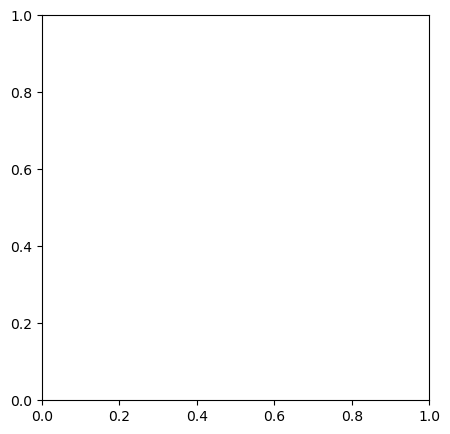

In [82]:
fig, ax = plt.subplots(figsize=(5, 5))

N = G.number_of_nodes()
pos = {(x, y): y * L + x + 1 for x, y in list(G.nodes())}  # Position mapping
labels = {pos[node]: pos[node] for node in list(G.nodes())}  # Node labels

edge_colors = ['red' if data['weight'] == -1 else 'black' for _, _, data in G.edges(data=True)]
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

nx.draw(G, pos, with_labels=True, labels=labels, edge_color=edge_colors, width=2, edge_cmap=plt.cm.Blues, ax=ax)
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(n1, n2): w for (n1, n2, _), w in zip(G.edges(data=True), edge_weights)})


In [53]:
if initial_cond == 'uniform_1':
    status_array = np.ones(L**2)/L**2
elif initial_cond == 'delta_1':
    status_array = np.zeros(L**2)
    status_array[coord1] = L**2
elif initial_cond == 'gauss_1':
    status_array = np.random.normal(0, 1/L, L**2)
status_array

array([-0.09348244, -0.06650017, -0.05668254,  0.1318519 ,  0.02866484,
       -0.02448801, -0.05884753, -0.0167585 ,  0.03773573, -0.09603241,
       -0.00265993,  0.10132982, -0.19757234, -0.22349857, -0.18059196,
        0.20461014,  0.01828313,  0.02721697, -0.08690901, -0.17570512,
       -0.18616113, -0.0566197 , -0.19469698,  0.05170289,  0.01996574,
        0.26077073,  0.02759621,  0.0046238 , -0.07013625, -0.02678722,
        0.13034613,  0.00350944,  0.06957039, -0.16287925, -0.10978969,
        0.02101953,  0.22530001, -0.00353338,  0.07823269,  0.08610502,
       -0.04320601, -0.19333084,  0.03372415, -0.1216041 ,  0.06902834,
        0.02474625, -0.05598688,  0.02038613, -0.15536249, -0.05262092,
        0.03811673, -0.02871688,  0.10200628, -0.11487816,  0.00393085,
       -0.03084033, -0.14234223, -0.18652402, -0.03345846,  0.13394614,
       -0.0367759 , -0.17379172,  0.04860436,  0.02985719, -0.1441053 ,
        0.09014105, -0.01190007,  0.01268634,  0.08294866, -0.02

In [54]:
status_distributionp = {}
status_distributionx = {}
for t in range(T_STEPS*no_obs):
    status_array = status_array - Deltat*(lapl@status_array)
    if ((t) % sampling == 0):
        print(t, np.mean(status_array), np.var(status_array))
        hist, bins = np.histogram(status_array, bins=30)
        center = (bins[:-1] + bins[1:]) / 2
        status_distributionp[t] = np.column_stack([center, hist])
        status_distributionx[t] = np.column_stack([np.array(range(len(status_array))), status_array])
        # plt.hist(status_array, bins=30, range=[-3, 3])
    #     hist, bins = np.histogram(status_array, bins=20)
    #     center = (bins[:-1] + bins[1:]) / 2
    #     # plt.plot(center, hist, 'o-', label=fr"$t={t:g}$")
# plt.hist(status_array, bins=20)
# bhbwp, bhbwn = symlog_binning(status_array, binnum=50)
# if bhbwp:
#     plt.plot(bhbwp[0], bhbwp[1], label=fr"$t={t+1}$")
# if bhbwn:
#     plt.plot(bhbwn[0], bhbwn[1], color=plt.gca().lines[-1].get_color())
edges

0 -0.020596670691407245 0.011309404573038164
20000 -0.02059667069140714 0.003321017880261141
40000 -0.020596670691407172 0.0015453945360124947
60000 -0.020596670691407165 0.0009393921603438271
80000 -0.02059667069140717 0.0006565910096172058
100000 -0.020596670691407172 0.0004958591907262907
120000 -0.020596670691407155 0.0003921181313253787
140000 -0.02059667069140712 0.00031902048621336416
160000 -0.020596670691407117 0.0002642217839169737
180000 -0.02059667069140711 0.0002213282187594964
200000 -0.020596670691407096 0.0001867520980780432
220000 -0.020596670691407103 0.00015832858473149823
240000 -0.020596670691407103 0.00013465830402251087
260000 -0.020596670691407103 0.0001147774082827866
280000 -0.02059667069140709 9.798449691653502e-05
300000 -0.02059667069140708 8.374595571020929e-05
320000 -0.02059667069140709 7.164186750135463e-05
340000 -0.020596670691407103 6.133358268435829e-05
360000 -0.020596670691407134 5.254323528057251e-05
380000 -0.020596670691407137 4.504009059761839

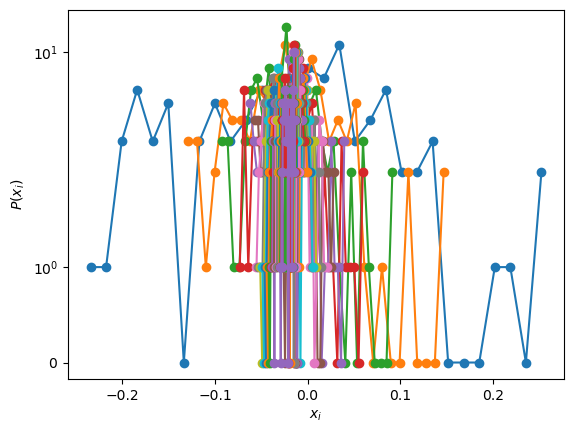

In [55]:
for k, v in status_distributionp.items():
    plt.plot(v[:, 0], v[:, 1], 'o-', label=fr"$t={t:g}$")
plt.xlabel(r"$x_i$")
plt.ylabel(r"$P(x_i)$")
plt.yscale('symlog')
# plt.xscale('log')

Text(0, 0.5, '$x_i$')

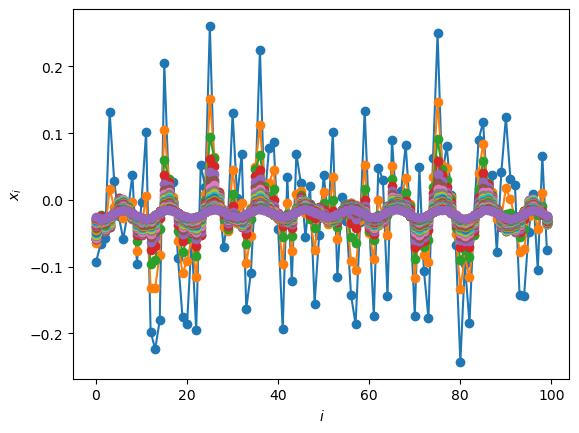

In [57]:
# to be plotted as a function of idistance
for k, v in status_distributionx.items():
    plt.plot(v[:, 0], v[:, 1], 'o-', label=fr"$t={t:g}$")
# plt.yscale('symlog')
plt.xlabel(r"$i$")
plt.ylabel(r"$x_i$")

In [50]:
lapl

array([[ 2,  1,  0, ...,  0,  0,  0],
       [ 1,  2, -1, ...,  0,  0,  0],
       [ 0, -1,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  4, -1,  0],
       [ 0,  0,  0, ..., -1,  4, -1],
       [ 0,  0,  0, ...,  0, -1,  4]])

In [ ]:
plt.legend()
plt.yscale('log')
plt.xlabel(r"$\vec{x}$")
plt.ylabel(r"$P(\vec{x})$")

In [ ]:
def calculate_distance(node1, node2):
    return abs(node1[0] - node2[0]) + abs(node1[1] - node2[1])

# Assuming you have created the grid using nx.grid_2d_graph
nodes = list(grid.nodes())

# Find the coordinates (x1, y1) and (x2, y2) for nodes i and j
x1, y1 = nodes[i - 1]
x2, y2 = nodes[j - 1]

sorted_X = sorted(X, key=lambda node: calculate_distance(nodes[node - 1], (x1, y1)))

In [ ]:
status_array.shape

In [ ]:
sl.shape